## Introduction

Data visualization is at the heart of data science! It is an essential task in data exploration and analysis. Making the proper visualization is vital to understand the data, uncover pattern and communicate insights. 

Mathplotlib is a popular and widely used python plotting library.  It is possibly the easiest way to plot data in python. It also provides some interative features such as zoom, pan and update. The functionality of matplotlib can also be extended with many third party packages such as Cartopy, Seaborn. Matplotlib is very powerful for creating aesthetics and publication quality plots but the figures are usually static.

Plotly is a python library for interactive plotting. The significance of interactive data visualization is apparent when analyzing large datasets with numerous features. Another advantage of plotly over matplotlib is that aestheically pleaseing plots can be created with few lines of codes. With plotly, over 40 beautiful interactive web-based visualizations can be displayed in jupyter notebook or saved to HTML files.

This notebook provides a code-base examples of how to create interactive plotting using plotly.  

The image below describes some fundamental types of plots for data visualization

![](https://i.redd.it/mkbu3ujj91y21.jpg)


## Dataset


We will be using the insitu snow depth data collected during the SnowEx 2020 Intensive Operation Period (IOP) in Grand Mesa, Colorado. Snow depth was measured using one of three instruments - Magnaprobe, Mesa 2, or pit ruler. Pit ruler data were collected from 150 snow pits identified for the Grand Mesa IOP. Check the [SnowEx20 Depth Probe Landing Page](https://nsidc.org/data/SNEX20_SD/versions/1) and the [User’s Guide](https://nsidc.org/sites/nsidc.org/files/SNEX20_SD-V001-UserGuide_1.pdf) for more info.

## Prep Data for Analysis

In [42]:
# import necessary packages

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [31]:
# Read data

snowDepth = pd.read_csv('SnowEx2020_SnowDepths_COGM_alldepths_v01.csv', parse_dates= {'Datetime': [2,3]})

The data has 37921 records of snow depth and 13 columns. Let's check the data types.


In [32]:
# rename some columns
snowDepth.rename(columns= {'Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)': 'Tool'}, inplace = True)
snowDepth

,Datetime,Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.200000,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.300000,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.200000,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.600000,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.100000,CRREL_B,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37916,2020-02-04 13:40:00,PR,300162,5S29,-108.16532,39.01801,745419.00,4322599.00,110,3094.260010,ruler,1
37917,2020-01-29 14:00:00,PR,300163,6S19,-108.18073,39.01846,744083.00,4322607.00,139,3051.560059,ruler,1
37918,2020-02-11 15:04:00,PR,300164,1N5,-108.21137,39.03618,741369.00,4324492.00,88,3031.800049,ruler,1
37919,2020-02-01 08:40:00,PR,300165,2S37,-108.15929,39.01926,745936.51,4322753.96,104,3102.780029,ruler,1


In [33]:
snowDepth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37921 entries, 0 to 37920
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        37921 non-null  datetime64[ns]
 1   Tool            37921 non-null  object        
 2   ID              37921 non-null  int64         
 3   PitID           37921 non-null  object        
 4   Longitude       37921 non-null  float64       
 5   Latitude        37921 non-null  float64       
 6   Easting         37921 non-null  float64       
 7   Northing        37921 non-null  float64       
 8   Depth (cm)      37921 non-null  int64         
 9   elevation (m)   37921 non-null  float64       
 10  equipment       37921 non-null  object        
 11  Version Number  37921 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 3.5+ MB


In [35]:
# Select records within the the period of GM IOP campaign
GMP_SnowDepth = snowDepth[(snowDepth['Datetime']>='1/28/2020') & (snowDepth['Datetime'] <='2/12/2020')]
GMP_SnowDepth

,Datetime,Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.200000,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.300000,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.200000,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.600000,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.100000,CRREL_B,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37916,2020-02-04 13:40:00,PR,300162,5S29,-108.16532,39.01801,745419.00,4322599.00,110,3094.260010,ruler,1
37917,2020-01-29 14:00:00,PR,300163,6S19,-108.18073,39.01846,744083.00,4322607.00,139,3051.560059,ruler,1
37918,2020-02-11 15:04:00,PR,300164,1N5,-108.21137,39.03618,741369.00,4324492.00,88,3031.800049,ruler,1
37919,2020-02-01 08:40:00,PR,300165,2S37,-108.15929,39.01926,745936.51,4322753.96,104,3102.780029,ruler,1


The snow depth data measurement of 150 snow pits measured with pit ruler. The other two mearement tool were used to collect snow depth along spiral tracks moving outwards from snow pit location. Let's check the number of records for each tools.

In [36]:
GMP_SnowDepth.Tool.value_counts()

MP    31850
M2     4390
PR      148
Name: Tool, dtype: int64

It appears there are 148 snow pits not 150. well, nsidc platforms says there are 150.  Let's select the Pit Ruler (PR) records

In [41]:
# Select records associated with a Pit ruler
pit_ruler_depth = GMP_SnowDepth[GMP_SnowDepth['Tool'] == 'PR']
pit_ruler_depth

,Datetime,Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
37755,2020-01-30 11:24:00,PR,300001,7C15,-108.19593,39.04563,742673.94,4325582.37,100,3048.699951,ruler,1
37756,2020-01-29 15:00:00,PR,300002,6C37,-108.14791,39.00760,746962.00,4321491.00,117,3087.709961,ruler,1
37757,2020-02-09 12:30:00,PR,300003,8C31,-108.16401,39.02144,745520.00,4322983.00,98,3099.639893,ruler,1
37758,2020-01-28 09:13:00,PR,300004,6N18,-108.19103,39.03404,743137.23,4324309.43,92,3055.590088,ruler,1
37760,2020-02-10 10:30:00,PR,300006,8S41,-108.14962,39.01659,746783.00,4322484.00,95,3113.870117,ruler,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37916,2020-02-04 13:40:00,PR,300162,5S29,-108.16532,39.01801,745419.00,4322599.00,110,3094.260010,ruler,1
37917,2020-01-29 14:00:00,PR,300163,6S19,-108.18073,39.01846,744083.00,4322607.00,139,3051.560059,ruler,1
37918,2020-02-11 15:04:00,PR,300164,1N5,-108.21137,39.03618,741369.00,4324492.00,88,3031.800049,ruler,1
37919,2020-02-01 08:40:00,PR,300165,2S37,-108.15929,39.01926,745936.51,4322753.96,104,3102.780029,ruler,1


Let's see what plotting with the plot method of dataframe and matplotlib look like. Let's recall the types of data visualization charts

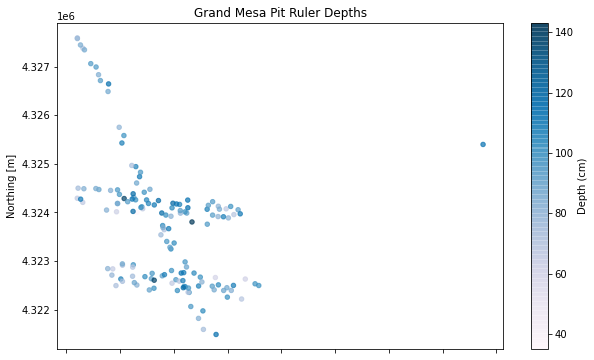

In [46]:

ax = pit_ruler_depth.plot(x='Easting', y='Northing', 
                          c='Depth (cm)', kind='scatter', alpha=0.7, 
                          colorbar=True, colormap='PuBu', legend=True,
                          figsize=(10,6))
ax.set_title('Grand Mesa Pit Ruler Depths')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
plt.show()

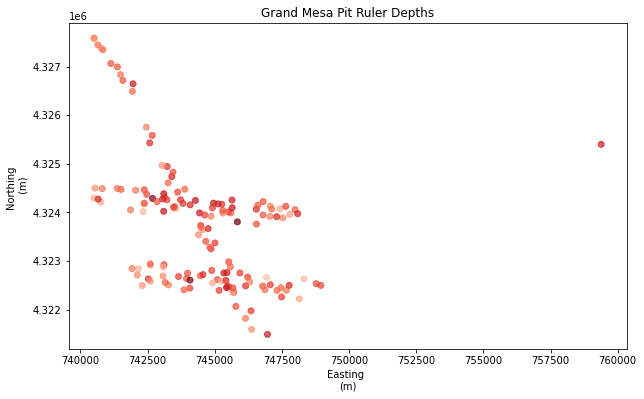

In [45]:
f, ax = plt.subplots(figsize = (10,6))

ax.scatter(pit_ruler_depth.Easting, pit_ruler_depth.Northing, c= pit_ruler_depth['Depth (cm)'], alpha=0.7, cmap= 'Reds')
ax.set(title = 'Grand Mesa Pit Ruler Depths', xlabel = 'Easting \n(m)', ylabel = 'Northing \n (m)')
plt.show()

As we can see in the above plots, there is no way to interactively check the value of each depth plotted. At least four lines of codes are required to produce the plots. Let's see what we can do with plotly

## Line Plots



## Scatter Plots

In [59]:
fig = px.scatter(pit_ruler_depth, x = pit_ruler_depth.Easting, y = pit_ruler_depth.Northing, color = 'Depth (cm)')
fig.show()

As we can from the cell above, an aesthetic interactive plot is produced with just two lines of code. We can add also change the hover name

## Pie Charts

## Colormaps

## Histograms

## Boxplots

## Violin Plots

## Density Heatmap

## 3D Scatter Plots

## 3D Line Plots

## Scatter Matrix

## Map Scatter Plot

## Chloropleth Maps

## Polar Chart

## Ternary Plot

## Facets

## Animated Plots